Definiciones utilizadas en esta hoja de referencia

Definiciones utilizadas en esta hoja de referencia

**Clave primaria:**

Una clave principal es un campo en una tabla que identifica de forma única

cada registro de la tabla. En bases de datos relacionales, primarias.

Las claves se pueden utilizar como campos para unir tablas.

**Clave externa:**

Una clave foránea es un campo en una tabla que hace referencia a la

clave principal de otra tabla. En una base de datos relacional,

Una forma de unir dos mesas es conectando el extranjero.

clave de una tabla a la clave principal de otra

**Relación uno a uno:**

Las relaciones de la base de datos describen las relaciones. <span style="color: var(--vscode-foreground);">entre registros en diferentes tablas. Cuando un uno a uno&nbsp;</span>  <span style="color: var(--vscode-foreground);">existe una relación entre dos tablas, un registro dado en&nbsp;</span> <span style="color: var(--vscode-foreground);">una tabla está relacionada de manera única con exactamente un registro en el</span><span style="color: var(--vscode-foreground);">otra mesa.</span>

**Relación uno a muchos:**

En una relación de uno a muchos, un registro en una tabla puede <span style="color: var(--vscode-foreground);">estar relacionado con uno o más registros en una segunda tabla.&nbsp;</span> <span style="color: var(--vscode-foreground);">Sin embargo, un registro dado en la segunda tabla sólo será&nbsp;</span> <span style="color: var(--vscode-foreground);">relacionado con un registro en la primera tabla.</span>

**Relación de varios a varios:**

<span style="color: var(--vscode-foreground);">En una relación de varios a varios, los registros de una tabla A determinada se pueden relacionar con uno o más registros de otra tabla B ,&nbsp;</span> <span style="color: var(--vscode-foreground);">y los registros de la tabla B también pueden relacionarse con muchos registros de la tabla A.</span>

**Datos de muestra**

In [6]:
CREATE SCHEMA practica6b;

Commands completed successfully

Total execution time: 00:00:00.036

In [7]:
CREATE TABLE practica6b.Artista (
    artist_id INT PRIMARY KEY,
    nombre NVARCHAR(100)
);

Commands completed successfully

Total execution time: 00:00:00.048

In [12]:
CREATE TABLE practica6b.Album (
    album_id INT PRIMARY KEY,
    titulo NVARCHAR(200),
    artist_id INT,
    FOREIGN KEY (artist_id) REFERENCES practica6b.Artista(artist_id)
);




Total execution time: 00:00:00

: 1050 (42S01): Table 'album' already exists

In [13]:
ALTER TABLE practica6b.Album
RENAME COLUMN titulo TO title;

Commands completed successfully

Total execution time: 00:00:00.046

In [14]:
ALTER TABLE practica6b.artista
RENAME COLUMN nombre TO name;

Commands completed successfully

Total execution time: 00:00:00.038

In [16]:
INSERT INTO practica6b.Artista (artist_id, name) VALUES
    (1, 'AC/DC'),
    (2, 'Aerosmith'),
    (3, 'Alanis Morissette');

Commands completed successfully

Total execution time: 00:00:00.030

In [19]:
SET FOREIGN_KEY_CHECKS = 0;

Commands completed successfully

Total execution time: 00:00:00.003

In [20]:
INSERT INTO practica6b.Album (album_id, title, artist_id) VALUES
    (1, 'For Those Who Rock', 1),
    (2, 'Dream On', 2),
    (3, 'Restless and Wild', 2),
    (4, 'Let There Be Rock', 1),
    (5, 'Rumours', 6);

Commands completed successfully

Total execution time: 00:00:00.025

**INNER JOIN**

Una combinación interna entre dos tablas <span style="color: var(--vscode-foreground);">devuelve solo los registros en los que una unión&nbsp;</span>  <span style="color: var(--vscode-foreground);">campo, como una clave, encuentra una coincidencia en&nbsp;</span>  <span style="color: var(--vscode-foreground);">Ambas tablas</span>

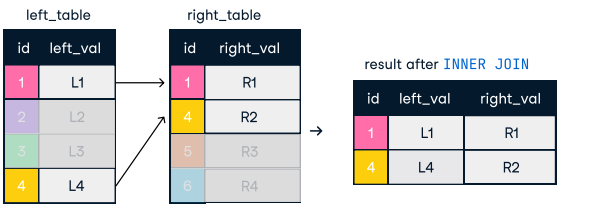<span style="color: var(--vscode-foreground);"><br></span>

In [26]:
SELECT art.artist_id,art.name,alb.title,album_id
FROM artista AS art 
INNER JOIN album AS alb 
ON art.artist_id = alb.artist_id;

(4 row(s) affected)

Total execution time: 00:00:01.015

artist_id,name,title,album_id
1,AC/DC,For Those Who Rock,1
1,AC/DC,Let There Be Rock,4
2,Aerosmith,Dream On,2
2,Aerosmith,Restless and Wild,3


**INNER JOIN with USING**

In [27]:
SELECT art.artist_id,art.name,alb.title,album_id
FROM artista AS art 
INNER JOIN album AS alb 
USING (artist_id);

(4 row(s) affected)

Total execution time: 00:00:01.004

artist_id,name,title,album_id
1,AC/DC,For Those Who Rock,1
1,AC/DC,Let There Be Rock,4
2,Aerosmith,Dream On,2
2,Aerosmith,Restless and Wild,3


**SELF JOIN** 

Las autouniones se utilizan para comparar los valores de una tabla con otros valores de la misma tabla mediante la unión de diferentes partes <span style="color: var(--vscode-foreground);">de una mesa juntos.&nbsp;</span> 

No se aplico **SELF JOIN** sino **INNER JOIN :**<span style="background-color: rgb(255, 255, 255); color: rgb(17, 17, 17); font-family: -apple-system, Roboto, SegoeUI, &quot;Segoe UI&quot;, &quot;Helvetica Neue&quot;, Helvetica, &quot;Microsoft YaHei&quot;, &quot;Meiryo UI&quot;, Meiryo, &quot;Arial Unicode MS&quot;, sans-serif; font-size: 16px;">En resumen el codigo que se aplica a continuacion, la consulta devuelve una lista de nombres de artistas junto con los títulos de sus álbumes, excluyendo aquellos con el mismo ID de álbum. Es una forma de explorar las relaciones entre artistas y sus álbumes en la base de datos.</span>

In [29]:
SELECT a.artist_id, a.name, alb1.album_id, alb2.title AS alb2_title
FROM album AS alb1
INNER JOIN album AS alb2 ON alb1.artist_id = alb2.artist_id
INNER JOIN artista AS a ON alb1.artist_id = a.artist_id
WHERE alb1.album_id <> alb2.album_id;

(4 row(s) affected)

Total execution time: 00:00:01.009

artist_id,name,album_id,alb2_title
1,AC/DC,4,For Those Who Rock
2,Aerosmith,3,Dream On
2,Aerosmith,2,Restless and Wild
1,AC/DC,1,Let There Be Rock


**LEFT JOIN** Una combinación a la izquierda conserva todo el original <span style="color: var(--vscode-foreground);">registros en la tabla de la izquierda y devuelve&nbsp;</span> <span style="color: var(--vscode-foreground);">Valores faltantes para las columnas de l</span><span style="color: var(--vscode-foreground);">a tabla de la derecha donde se encuentra el campo de unión&nbsp;</span> <span style="color: var(--vscode-foreground);">no encontró una coincidencia.</span>

  

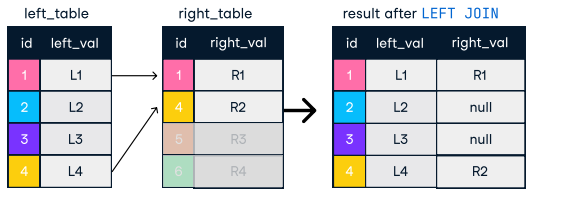

In [35]:
SELECT *
FROM artista AS art 
LEFT JOIN album AS alb
ON art.artist_id = alb.artist_id;

(5 row(s) affected)

Total execution time: 00:00:01.010

artist_id,name,album_id,title,artist_id
1,AC/DC,1,For Those Who Rock,1
1,AC/DC,4,Let There Be Rock,1
2,Aerosmith,2,Dream On,2
2,Aerosmith,3,Restless and Wild,2
3,Alanis Morissette,NULL,NULL,NULL


**RIGHT JOIN**

Una unión correcta mantiene todo el original r<span style="color: var(--vscode-foreground);">egistros en la tabla derecha y devuelve&nbsp;</span>  <span style="color: var(--vscode-foreground);">valores faltantes para cualquier columna de</span>

la tabla de la izquierda donde está el campo de unión <span style="color: var(--vscode-foreground);">no encontré una coincidencia. Las uniones derechas son&nbsp;</span>  <span style="color: var(--vscode-foreground);">mucho menos común que las uniones izquierdas,&nbsp;</span>  <span style="color: var(--vscode-foreground);">porque las uniones derechas siempre se pueden reescribir como uniones izquierdas.</span>

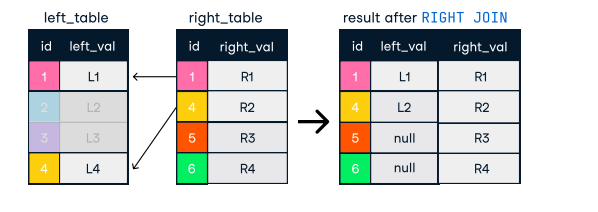<span style="color: var(--vscode-foreground);"><br></span>

<span style="color: var(--vscode-foreground);"><br></span>

In [36]:
SELECT *
FROM artista AS art
RIGHT JOIN album AS alb
ON art.artist_id = alb.artist_id


(5 row(s) affected)

Total execution time: 00:00:01.018

artist_id,name,album_id,title,artist_id
1,AC/DC,1,For Those Who Rock,1
2,Aerosmith,2,Dream On,2
2,Aerosmith,3,Restless and Wild,2
1,AC/DC,4,Let There Be Rock,1
NULL,NULL,5,Rumours,6


**FULL JOIN** Una unión completa combina una unión izquierda y <span style="color: var(--vscode-foreground);">unirse a la derecha. Una unión completa devolverá todo</span>

registros de una tabla, independientemente de <span style="color: var(--vscode-foreground);">si hay una coincidencia en el&nbsp;</span> <span style="color: var(--vscode-foreground);">unirse al campo en la otra tabla,&nbsp;</span> <span style="color: var(--vscode-foreground);">devolviendo valores nulos en consecuencia.</span>

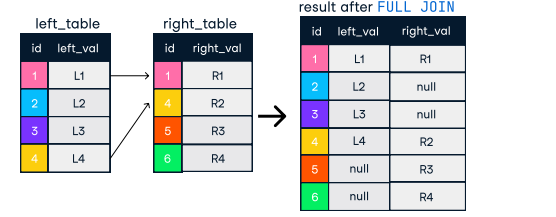<span style="color: var(--vscode-foreground);"><br></span>

In [43]:
SELECT *
FROM artista AS art
LEFT JOIN album AS alb ON art.artist_id = alb.artist_id
UNION
SELECT *
FROM artista AS art
RIGHT JOIN album AS alb ON art.artist_id = alb.artist_id;

(6 row(s) affected)

Total execution time: 00:00:01.015

artist_id,name,album_id,title,artist_id
1,AC/DC,1,For Those Who Rock,1
1,AC/DC,4,Let There Be Rock,1
2,Aerosmith,2,Dream On,2
2,Aerosmith,3,Restless and Wild,2
3,Alanis Morissette,NULL,NULL,NULL
NULL,NULL,5,Rumours,6


**CROSS JOIN : UNIÓN CRUZADA ACTIVADA** Crea todas las combinaciones posibles de dos mesas no requiere un campo para unirse.

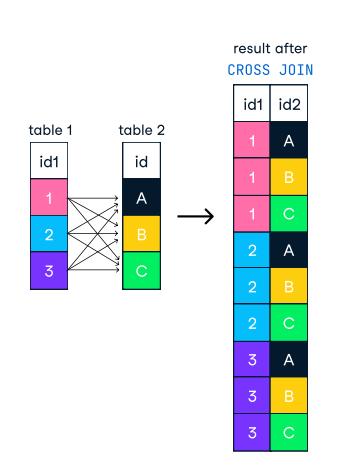

In [46]:
SELECT name,title
FROM artista
CROSS JOIN album;

(15 row(s) affected)

Total execution time: 00:00:01.016

name,title
Alanis Morissette,For Those Who Rock
Aerosmith,For Those Who Rock
AC/DC,For Those Who Rock
Alanis Morissette,Dream On
Aerosmith,Dream On
AC/DC,Dream On
Alanis Morissette,Restless and Wild
Aerosmith,Restless and Wild
AC/DC,Restless and Wild
Alanis Morissette,Let There Be Rock


**Set Theory Operators in SQL**

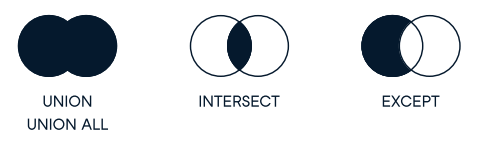

**UNION:** El operador se utiliza para combinar verticalmente los resultados. <span style="color: var(--vscode-foreground);">de dos declaraciones. Para trabajar sin errores,</span>

todas las declaraciones deben tener el mismo número de l<span style="color: var(--vscode-foreground);">as columnas y las columnas correspondientes deben tener el mismo</span>

tipo de datos. no devuelve duplicados.

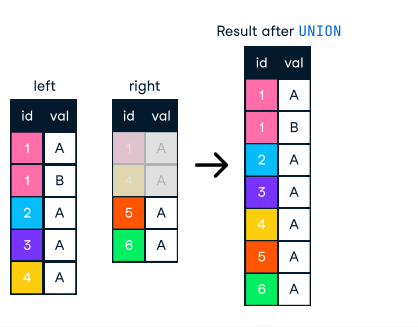

In [48]:
SELECT artist_id
FROM artista
UNION 
SELECT artist_id
FROM album;

(4 row(s) affected)

Total execution time: 00:00:01.015

artist_id
1
2
3
6


**UNION ALL** El operador funciona igual, pero <span style="color: var(--vscode-foreground);">devuelve valores duplicados. Las mismas restricciones de&nbsp;</span> <span style="color: var(--vscode-foreground);">válido para UNION TODOS</span>

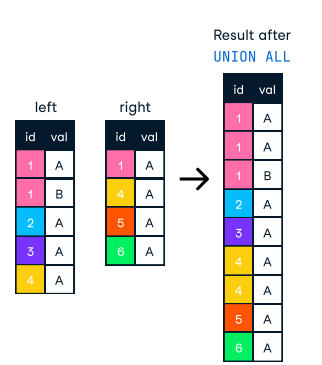<span style="color: var(--vscode-foreground);"><br></span>

In [49]:
SELECT artist_id
FROM artista
UNION ALL
SELECT artist_id
FROM album;

(8 row(s) affected)

Total execution time: 00:00:01.008

artist_id
1
2
3
1
1
2
2
6


**INTERSECT:** El operador devuelve sólo filas idénticas de dos tablas.

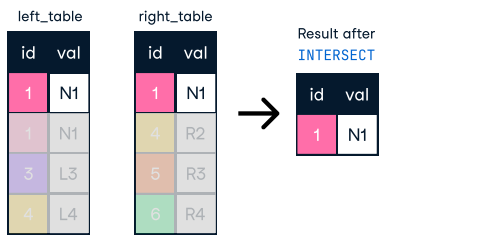

In [50]:
SELECT artist_id
FROM artista
INTERSECT
SELECT artist_id
FROM album;


(2 row(s) affected)

Total execution time: 00:00:01.012

artist_id
1
2


**EXCEPT:** El operador devuelve sólo aquellas filas de <span style="color: var(--vscode-foreground);">la tabla de la izquierda que no están presentes en la tabla de la derecha.</span>

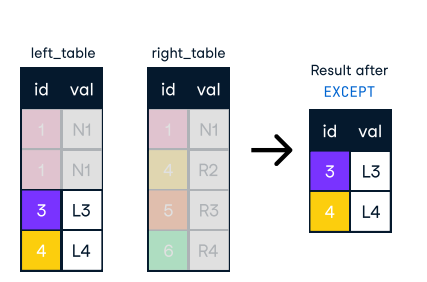<span style="color: var(--vscode-foreground);"><br></span>

In [51]:
SELECT artist_id
FROM artista
EXCEPT
SELECT artist_id
FROM Album

(1 row(s) affected)

Total execution time: 00:00:01.036

artist_id
3


**SEMI JOIN:** Una semi unión elige registros en la primera tabla donde l<span style="color: var(--vscode-foreground);">a condición se cumple en la segunda tabla. Una semi unión hace&nbsp;</span> <span style="color: var(--vscode-foreground);">uso de una cláusula WHERE para usar la segunda tabla como filtro p</span><span style="color: var(--vscode-foreground);">or el primero.</span>

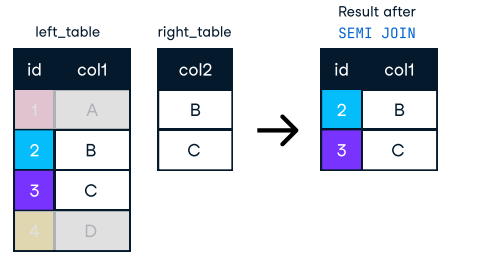

In [53]:
SELECT *
FROM album
WHERE artist_id IN 
(SELECT artist_id FROM artista);


(4 row(s) affected)

Total execution time: 00:00:01.055

album_id,title,artist_id
1,For Those Who Rock,1
4,Let There Be Rock,1
2,Dream On,2
3,Restless and Wild,2


**ANTI JOIN:** El anti-unión elige registros en la primera tabla donde l<span style="color: var(--vscode-foreground);">a condición NO se cumple en la segunda tabla. Hace uso de</span>

una cláusula WHERE para usar valores de exclusión del segundo tabla**.**

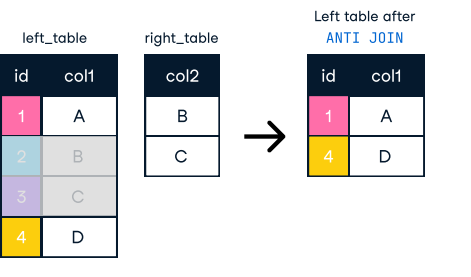

In [54]:
SELECT *
FROM album
WHERE artist_id NOT IN (select artist_id FROM artista);


(1 row(s) affected)

Total execution time: 00:00:01.046

album_id,title,artist_id
5,Rumours,6
